# Problem statement
## DATASET
1. dateCrawled : when this ad was first crawled, all field-values are taken from this date
2. name : "name" of the car
3. seller : private or dealer
4. offerType : the selling type of the car
5. price : the price on the ad to sell the car
6. abtest : unknown
7. vehicleType : type of the car. Limousine, kleinwagen, kombi, bus etc.
8. yearOfRegistration : at which year the car was first registered
9. gearbox : manuel or otomatic
10. powerPS : power of the car in PS
11. model : model of the car
12. kilometer : how many kilometers the car has driven
13. monthOfRegistration : at which month the car was first registered
14. fuelType : benzin, diesel, lpg etc
15. brand : brand of the car. Mercedes, Porsche, audi etc…
16. notRepairedDamage : if the car has a damage which is not repaired yet. Yes or no
17. dateCreated : the date for which the ad at ebay was created
18. nrOfPictures : number of pictures in the ad
19. postalCode : code that shows the location of the car
20. lastSeenOnline : when the crawler saw this ad last online

In [1]:
# Import required libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib as plt

# Load the dataset
df = pd.read_csv("cars_sample.csv", encoding='unicode_escape')

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

df.seller.value_counts()

df.offerType.value_counts()

df.abtest.value_counts()

df.vehicleType.value_counts()

df.yearOfRegistration.value_counts()

df.gearbox.value_counts()

df.powerPS.value_counts()

df.model.value_counts()

df.kilometer.value_counts()

df.monthOfRegistration.value_counts()

df.fuelType.value_counts()

df.notRepairedDamage.value_counts()

df.dateCreated.value_counts()

df.postalCode.value_counts()

df.lastSeen.value_counts()

df.price.value_counts()

df.shape

## Drop unnecessary columns 

- we can drop seller as we are having only private seller

- we can drop offer type as we are having 99.99 percent data for a single class/unique values

- we can drop name as of now because it is very diifcult to seperate each model.

- model - we can delete as it is a duplicate of gearbox
- Name: We can delete as of now as many names
- abtest: we can keep
- Vehicle type : we can keep (8)
- yearOfRegistration: we can keep (96 years)
- GrarBox - 2
- PowerPS - 96
- model - we can delete as it a duplicate
- Kilometer - 13
- monthOfRegistration - 12
- fuel -7
- brand - 40
- notRepairedDamage -2
- postalCode - Need to think - Many (7050)
- Price - Continuous - Keep


In [2]:
# Drop unnecessary columns
df = df.drop(['seller', 'offerType', 'model', 'name'], axis=1)


In [3]:
## calculate null values and impute with repeated values

uniqueValues = df.nunique()
missing_value = (df.isnull().sum()/len(df))*100
# missing_value_df = pd.DataFrame({'percent_missing': missing_value.sort_values(ascending=False),'uniqueValues':uniqueValues})
missing_value_df = pd.DataFrame({'percent_missing': missing_value.sort_values(ascending=False)})
missing_value_df

percent_missing
notRepairedDamage          19.431611
vehicleType                10.375792
fuelType                    9.005820
gearbox                     5.647887
dateCrawled                 0.000000
price                       0.000000
abtest                      0.000000
yearOfRegistration          0.000000
powerPS                     0.000000
kilometer                   0.000000
monthOfRegistration         0.000000
brand                       0.000000
dateCreated                 0.000000
postalCode                  0.000000
lastSeen                    0.000000

In [4]:
# Calculate and impute null values
df['notRepairedDamage'] = df['notRepairedDamage'].fillna(df['notRepairedDamage'].mode()[0])
df['vehicleType'] = df['vehicleType'].fillna(df['vehicleType'].mode()[0])
df['fuelType'] = df['fuelType'].fillna(df['fuelType'].mode()[0])
df['gearbox'] = df['gearbox'].fillna(df['gearbox'].mode()[0])

# Separate date and time in dateCrawled, dateCreated & lastSeen
df['Date_dateCrawled'] = pd.to_datetime(df['dateCrawled']).dt.date
df['Time_dateCrawled'] = pd.to_datetime(df['dateCrawled']).dt.time
df = df.drop(['dateCrawled'], axis=1)

df['Date_dateCreated'] = pd.to_datetime(df['dateCreated']).dt.date
df['Time_dateCreated'] = pd.to_datetime(df['dateCreated']).dt.time
df = df.drop(['dateCreated'], axis=1)

df['Date_lastSeen'] = pd.to_datetime(df['lastSeen']).dt.date
df['Time_lastSeen'] = pd.to_datetime(df['lastSeen']).dt.time
df = df.drop(['lastSeen'], axis=1)

df = df.drop(['Date_dateCrawled', 'Time_dateCrawled', 'Date_dateCreated', 'Date_lastSeen', 'Time_lastSeen'], axis=1)



## Categorical columns

Univariate Analysis: In univariate analysis, you only have one variable, so the most common plots used are:

- Histograms: To visualize the distribution of a continuous variable
- Bar Charts: To visualize the distribution of a categorical variable
- Box Plots: To visualize the distribution of a continuous variable and to identify outliers
- Density Plots: To visualize the distribution of a continuous variable with a smoother curve

What are the five concepts of univariate analysis?

A. The five concepts of univariate analysis are:
1. Central Tendency: Measures like mean, median, and mode to understand the center of the data distribution.
2. Dispersion: Measures such as range, variance, and standard deviation to assess the spread or variability of the data.
3. Distribution: Understanding the shape of the data through histograms, box plots, and probability plots.
4. Outliers: Identification and treatment of extreme values that deviate significantly from the rest of the data.
5. Summary Statistics: Providing a concise overview of the data through quantiles, percentiles, and other statistical measures.

In [5]:
# Univariate analysis - Categorical columns
import matplotlib.pyplot as plt
import seaborn as sns

    
def univariate_cat(column):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Pie Plot
    df[column].value_counts().plot.pie(autopct="%1.0f%%", ax=axes[0])
    axes[0].set_title("Pie Plot - " + column)

    # Bar Plot
    df[column].value_counts(normalize=True).plot.barh(ax=axes[1])
    axes[1].set_title("Bar Plot - " + column)

    # Histogram
    sns.countplot(x=df[column], ax=axes[2])
    axes[2].set_title("Histogram - " + column)
    axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()

# Perform univariate analysis for selected columns
# selected_columns = ['abtest', 'vehicleType', 'gearbox', 'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage', 'postalCode', 'price']
# for column in selected_columns:
#     univariate_cat(column)



## Continuous colums

Univariate Analysis: In univariate analysis, you only have one variable, so the most common plots used are:

- Histograms: To visualize the distribution of a continuous variable
- Bar Charts: To visualize the distribution of a categorical variable
- Box Plots: To visualize the distribution of a continuous variable and to identify outliers
- Density Plots: To visualize the distribution of a continuous variable with a smoother curve

In [6]:
# Univariate analysis - Continuous columns
import seaborn as sns

def univariate_con(column):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

    # Box Plot
    ax1.boxplot(df[column])
    ax1.set_title("Box Plot - " + column)

    # Histogram
    sns.histplot(df[column], ax=ax2, kde=True)
    ax2.set_title("Histogram - " + column)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()
    
# Perform univariate analysis for selected continuous columns
# selected_continuous_columns = ['yearOfRegistration', 'powerPS', 'kilometer', 'price']
# for column in selected_continuous_columns:
#     univariate_con(column)

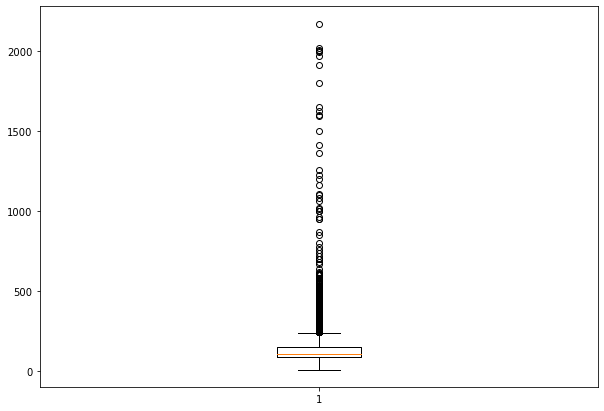

6150.0
-7975.0 16625.0


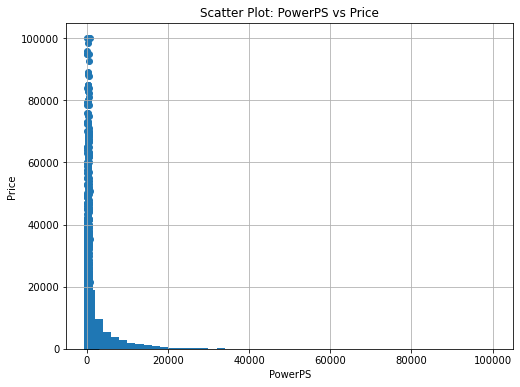

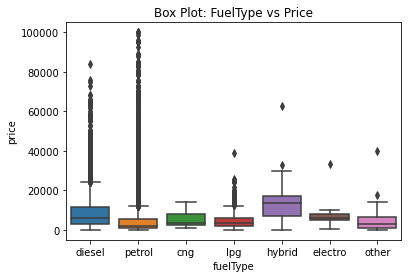

price                  1.000000
yearOfRegistration     0.308154
powerPS                0.500384
kilometer             -0.418295
monthOfRegistration    0.073753
postalCode             0.082894
Name: price, dtype: float64


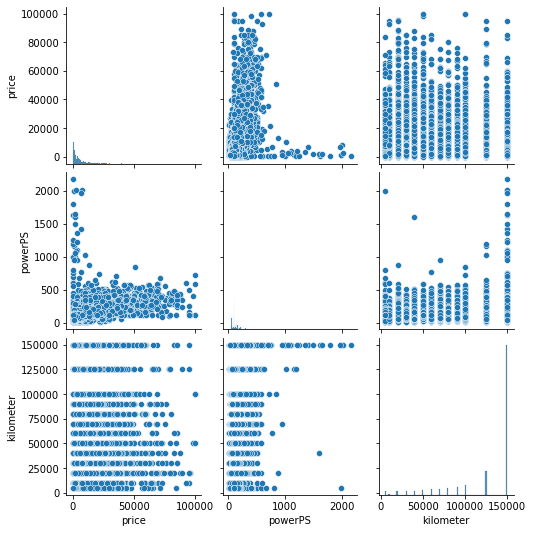

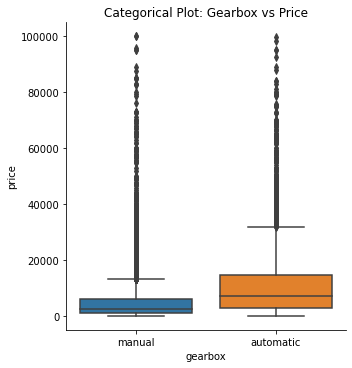

In [7]:
### yearOfRegistration

# univariate_con('yearOfRegistration')

df['yearOfRegistration'].describe()

# fig = plt.figure(figsize =(10, 7))
# plt.boxplot(df.yearOfRegistration)
# plt.show()

# We can clearly see there are some outliers in years data. We have drop the data which is less than 1900 and greater than 2020
# As there are only 5 rows which are having incorrect data so we can directly delete those rows.

df.shape

df = df[~((df['yearOfRegistration'] >= 2020) | (df['yearOfRegistration'] <= 1900))]

df.shape

df['yearOfRegistration'].describe()

### powerPS

# univariate_con('powerPS')

df.powerPS.describe()

Test = df[(df['powerPS'] <= 10) | (df['powerPS'] >= 2400)]
Test

# The PS range of recent vehicles is from 10PS to 2400PS. The data above or below these values are probably incorrect entry.
# We can impute these values with mean as there are 3462 rows.

df['powerPS'] = np.where((df['powerPS'] > 2400) | (df['powerPS'] < 10), 110, df['powerPS'])

df['powerPS'].describe()

fig = plt.figure(figsize =(10, 7))
plt.boxplot(df.powerPS)
plt.show()

### kilometer

# univariate_con('kilometer')

df.kilometer.describe()

### price

# univariate_con('price')

df.price.describe()

df.shape

Test = df[~(df['price'] >= 100000)]

Test.shape

Test = df[~(df['price'] == 0)]

Test.shape

# There are few records with price on the ad to see the car is more than 1L, which are outliers and also some rows with car cost = 0
# which means the car is free, which is not correct. We can drop those records as most of the data is lying under 1L.

df = df[~((df['price'] >= 100000) | (df['price'] == 0))]

df.hist(column=['price'], bins=50, figsize=(8, 6))

# univariate_con('price')

df.shape

#### IQR

# Import numpy library
import numpy as np
  
data = [32, 36, 46, 47, 56, 69, 75, 79, 79, 88, 89, 91, 92, 93, 96, 97, 
        101, 105, 112, 116]
  
# First quartile (Q1)
Q1 = np.percentile(df.price, 25, interpolation='midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(df.price, 75, interpolation='midpoint')
  
# Interquartile range (IQR)
IQR = Q3 - Q1
  
print(IQR)

lower_fence = Q1 - (1.5 * IQR)
upper_fence = Q3 + (1.5 * IQR)

print(lower_fence, upper_fence)

# Upper fence as per IQR is 17775

# Bi-Variate analysis

df.head()

# Scatter Plots:

# Use scatter plots to visualize the relationship between 'price' and continuous variables such as 'powerPS', 'kilometer', etc.

import matplotlib.pyplot as plt

plt.scatter(df['powerPS'], df['price'])
plt.xlabel('PowerPS')
plt.ylabel('Price')
plt.title('Scatter Plot: PowerPS vs Price')
plt.show()

# Box Plots:

# Box plots can be used to visualize the distribution of 'price' across different categories of a categorical variable.

import seaborn as sns

sns.boxplot(x='fuelType', y='price', data=df)
plt.title('Box Plot: FuelType vs Price')
plt.show()

# Correlation Matrix:

# Compute the correlation matrix to see the correlation coefficients between 'price' and other numerical variables.

correlation_matrix = df.corr()
print(correlation_matrix['price'])

# Pair Plots:

# Pair plots can provide a quick overview of relationships between numerical variables.

sns.pairplot(df[['price', 'powerPS', 'kilometer']])
plt.show()

# Categorical Plots:

# Use categorical plots to visualize the relationship between 'price' and categorical variables.

sns.catplot(x='gearbox', y='price', data=df, kind='box')
plt.title('Categorical Plot: Gearbox vs Price')
plt.show()


# Feature Engineering

In [8]:

for i in df.columns:
    print(f"---------------------------------{i}--------------------------------------------------------")
    print(df[i].unique())

---------------------------------price--------------------------------------------------------
[ 4450 13299  3200 ... 31999 24301 36399]
---------------------------------abtest--------------------------------------------------------
['test' 'control']
---------------------------------vehicleType--------------------------------------------------------
['limousine' 'suv' 'bus' 'small car' 'station wagon' 'coupe' 'others'
 'cabrio']
---------------------------------yearOfRegistration--------------------------------------------------------
[2003 2005 2006 2008 1995 1996 1997 2001 2016 1999 1993 2002 1998 2017
 1992 1991 2000 2011 2004 2009 1979 2010 2007 1972 1994 2013 2018 2012
 1989 2014 2015 1990 1988 1970 1961 1960 1966 2019 1983 1964 1971 1975
 1987 1977 1976 1980 1974 1978 1962 1938 1967 1986 1985 1959 1982 1981
 1984 1950 1945 1910 1965 1958 1973 1955 1956 1963 1936 1928 1968 1940
 1969 1954 1957 1934 1929 1952 1943 1951 1941 1947 1953]
---------------------------------gearbox------

In [9]:
results_dict = {}

for i in df.columns:
    #print(f"---------------------------------{i}--------------------------------------------------------")
    unique_values = df[i].unique()
    #print(unique_values)
    
    # Store the unique values as a list in the dictionary
    results_dict[i] = list(unique_values)

# Find the maximum length of unique values
max_length = max(len(values) for values in results_dict.values())

# Pad the lists with NaN to make them of equal length
for values in results_dict.values():
    while len(values) < max_length:
        values.append("-")

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame.from_dict(results_dict)

# Display the resulting DataFrame
print("Resulting DataFrame:")
print(results_df)

Resulting DataFrame:
      price   abtest    vehicleType yearOfRegistration    gearbox powerPS  \
0      4450     test      limousine               2003     manual     150   
1     13299  control            suv               2005  automatic     163   
2      3200        -            bus               2006          -     101   
3      4500        -      small car               2008          -      86   
4     18750        -  station wagon               1995          -     185   
5       988        -          coupe               1996          -      90   
6       400        -         others               1997          -     110   
7      1399        -         cabrio               2001          -     136   
8      4680        -              -               2016          -     122   
9      8340        -              -               1999          -     140   
10     1870        -              -               1993          -      82   
11     2500        -              -               2002 

1. **abtest:**
   - This is a binary categorical variable with values 'test' and 'control'. You can encode it using binary encoding (0 and 1) or one-hot encoding.

2. **vehicleType:**
   - Apply one-hot encoding to convert the categorical variable "vehicleType" into binary columns for each category. There are categories like 'station wagon,' 'limousine,' 'small car,' 'suv,' 'bus,' 'coupe,' 'cabrio,' and 'others.'

3. **yearOfRegistration:**
   - You can calculate the age of the vehicle by subtracting the "yearOfRegistration" from the current year. This can be used as a feature.
   - Create bins for vehicle age or decade of registration to capture patterns.

4. **gearbox:**
   - Convert "gearbox" to a binary variable using one-hot encoding (0 for manual, 1 for automatic).

5. **powerPS:**
   - Check for outliers and consider winsorizing or capping extreme values.
   - Create bins for power ranges or apply logarithmic transformations to handle the wide range of values.

6. **kilometer:**
   - No specific feature engineering may be needed for "kilometer" unless there are outliers. Ensure the values are within a reasonable range.

7. **monthOfRegistration:**
   - Convert "monthOfRegistration" into a cyclical feature (e.g., using sine and cosine transformations) to capture potential seasonal patterns.

8. **fuelType:**
   - Apply one-hot encoding to convert the categorical variable "fuelType" into binary columns for each fuel type.

9. **brand:**
   - Depending on the number of unique brands, apply one-hot encoding or label encoding.
   - Consider grouping rare brands into an "other" category.

10. **notRepairedDamage:**
    - Convert "notRepairedDamage" into a binary variable using one-hot encoding (0 for 'no' and 1 for 'yes').

11. **postalCode:**
    - Depending on the cardinality, consider grouping postal codes into broader regions or using target encoding.

12. **price:**
    - Check for outliers in the "price" column and consider winsorizing or capping extreme values.
    - If the distribution is highly skewed, consider applying a logarithmic transformation to make it more symmetric.




### Creating dummies for ab test:

In [10]:
df.head()

df1 = df.copy()

df = pd.get_dummies(df, columns=['abtest','vehicleType', 'fuelType', 'gearbox', 'notRepairedDamage'], drop_first=True)

In [11]:
df.head()

price  yearOfRegistration  powerPS  kilometer  monthOfRegistration  \
0   4450                2003      150     150000                    3   
1  13299                2005      163     150000                    6   
2   3200                2003      101     150000                   11   
3   4500                2006       86      60000                   12   
4  18750                2008      185     150000                   11   

        brand  postalCode Time_dateCreated  abtest_test  vehicleType_cabrio  \
0         bmw       20257         00:00:00            1                   0   
1       volvo       88045         00:00:00            0                   0   
2  volkswagen       27449         00:00:00            1                   0   
3        seat       34537         00:00:00            0                   0   
4       volvo       55270         00:00:00            1                   0   

   vehicleType_coupe  vehicleType_limousine  vehicleType_others  \
0                  0                      1                   0   
1                  0                      0                   0   
2                  0                      0                   0   
3                  0                      0                   0   
4                  0                      0                   0   

   vehicleType_small car  vehicleType_station wagon  vehicleType_suv  \
0                      0                          0                0   
1                      0                          0                1   
2                      0                          0                0   
3                      1                          0                0   
4                      0                          0                1   

   fuelType_diesel  fuelType_electro  fuelType_hybrid  fuelType_lpg  \
0                1                 0                0             0   
1                1                 0                0             0   
2                1                 0                0             0   
3                0                 0                0             0   
4                1                 0                0             0   

   fuelType_other  fuelType_petrol  gearbox_manual  notRepairedDamage_yes  
0               0                0               1                      0  
1               0                0               1                      0  
2               0                0               1                      0  
3               0                1               1                      0  
4               0                0               0                      0

In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'brand' column
df['brand_encoded'] = label_encoder.fit_transform(df['brand'])

# Print the mapping between original labels and encoded labels
print("Mapping of original labels to encoded labels:")
for original_label, encoded_label in zip(df['brand'], df['brand_encoded']):
    print(f"{original_label} -> {encoded_label}")

# Display the DataFrame with the new encoded column
print("\nDataFrame with the 'brand_encoded' column:")
print(df[['brand', 'brand_encoded']])

df = df.drop('brand', axis=1)



Mapping of original labels to encoded labels:
bmw -> 2
volvo -> 39
volkswagen -> 38
seat -> 30
volvo -> 39
volkswagen -> 38
opel -> 24
mercedes_benz -> 20
opel -> 24
skoda -> 31
mercedes_benz -> 20
opel -> 24
toyota -> 36
bmw -> 2
opel -> 24
volvo -> 39
nissan -> 23
sonstige_autos -> 33
volkswagen -> 38
volkswagen -> 38
mazda -> 19
mitsubishi -> 22
volkswagen -> 38
volkswagen -> 38
mitsubishi -> 22
audi -> 1
fiat -> 9
nissan -> 23
alfa_romeo -> 0
saab -> 29
mercedes_benz -> 20
volkswagen -> 38
bmw -> 2
bmw -> 2
toyota -> 36
ford -> 10
mercedes_benz -> 20
mercedes_benz -> 20
opel -> 24
volkswagen -> 38
peugeot -> 25
bmw -> 2
land_rover -> 18
volkswagen -> 38
audi -> 1
sonstige_autos -> 33
volkswagen -> 38
mercedes_benz -> 20
nissan -> 23
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
peugeot -> 25
subaru -> 34
mini -> 21
bmw -> 2
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
opel -> 24
mercedes_benz -> 20
opel -> 24
bmw -> 2
volkswagen -> 38
citroen ->

volkswagen -> 38
volkswagen -> 38
bmw -> 2
opel -> 24
mazda -> 19
audi -> 1
mazda -> 19
opel -> 24
seat -> 30
ford -> 10
audi -> 1
mercedes_benz -> 20
honda -> 11
volkswagen -> 38
ford -> 10
audi -> 1
fiat -> 9
ford -> 10
opel -> 24
skoda -> 31
opel -> 24
opel -> 24
volvo -> 39
opel -> 24
audi -> 1
audi -> 1
volkswagen -> 38
mercedes_benz -> 20
mitsubishi -> 22
ford -> 10
audi -> 1
mercedes_benz -> 20
opel -> 24
opel -> 24
volkswagen -> 38
volkswagen -> 38
opel -> 24
bmw -> 2
volkswagen -> 38
dacia -> 6
opel -> 24
ford -> 10
mazda -> 19
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
opel -> 24
peugeot -> 25
audi -> 1
nissan -> 23
opel -> 24
bmw -> 2
dacia -> 6
opel -> 24
volkswagen -> 38
volkswagen -> 38
bmw -> 2
smart -> 32
bmw -> 2
volkswagen -> 38
volkswagen -> 38
sonstige_autos -> 33
volkswagen -> 38
seat -> 30
opel -> 24
opel -> 24
volkswagen -> 38
audi -> 1
audi -> 1
ford -> 10
renault -> 27
opel -> 24
audi -> 1
dacia -> 6
volkswagen -> 38
mercedes_benz -> 20

audi -> 1
renault -> 27
ford -> 10
peugeot -> 25
volkswagen -> 38
renault -> 27
mercedes_benz -> 20
mercedes_benz -> 20
opel -> 24
volkswagen -> 38
mercedes_benz -> 20
bmw -> 2
smart -> 32
volkswagen -> 38
sonstige_autos -> 33
volkswagen -> 38
mercedes_benz -> 20
volkswagen -> 38
bmw -> 2
peugeot -> 25
skoda -> 31
volkswagen -> 38
chrysler -> 4
bmw -> 2
mercedes_benz -> 20
volkswagen -> 38
renault -> 27
bmw -> 2
bmw -> 2
chrysler -> 4
subaru -> 34
seat -> 30
hyundai -> 12
renault -> 27
ford -> 10
opel -> 24
citroen -> 5
opel -> 24
bmw -> 2
renault -> 27
alfa_romeo -> 0
volkswagen -> 38
volkswagen -> 38
sonstige_autos -> 33
volkswagen -> 38
bmw -> 2
opel -> 24
renault -> 27
audi -> 1
volkswagen -> 38
toyota -> 36
opel -> 24
peugeot -> 25
sonstige_autos -> 33
fiat -> 9
opel -> 24
volkswagen -> 38
volkswagen -> 38
nissan -> 23
seat -> 30
nissan -> 23
opel -> 24
bmw -> 2
ford -> 10
volkswagen -> 38
toyota -> 36
seat -> 30
seat -> 30
opel -> 24
bmw -> 2
renault -> 27
jaguar -> 13
bmw -> 2
s

mazda -> 19
volkswagen -> 38
volkswagen -> 38
audi -> 1
citroen -> 5
peugeot -> 25
peugeot -> 25
volkswagen -> 38
ford -> 10
mitsubishi -> 22
opel -> 24
mercedes_benz -> 20
mercedes_benz -> 20
mitsubishi -> 22
volkswagen -> 38
audi -> 1
opel -> 24
audi -> 1
bmw -> 2
volkswagen -> 38
renault -> 27
bmw -> 2
fiat -> 9
audi -> 1
volkswagen -> 38
mini -> 21
audi -> 1
volkswagen -> 38
mazda -> 19
bmw -> 2
volkswagen -> 38
bmw -> 2
porsche -> 26
smart -> 32
saab -> 29
opel -> 24
mitsubishi -> 22
mercedes_benz -> 20
audi -> 1
opel -> 24
mercedes_benz -> 20
suzuki -> 35
volvo -> 39
volkswagen -> 38
ford -> 10
volkswagen -> 38
opel -> 24
mercedes_benz -> 20
audi -> 1
audi -> 1
mercedes_benz -> 20
audi -> 1
opel -> 24
renault -> 27
audi -> 1
opel -> 24
citroen -> 5
seat -> 30
renault -> 27
renault -> 27
bmw -> 2
volkswagen -> 38
ford -> 10
ford -> 10
alfa_romeo -> 0
volkswagen -> 38
volkswagen -> 38
opel -> 24
volkswagen -> 38
ford -> 10
fiat -> 9
audi -> 1
opel -> 24
volkswagen -> 38
bmw -> 2
bm

suzuki -> 35
volvo -> 39
ford -> 10
trabant -> 37
toyota -> 36
volkswagen -> 38
bmw -> 2
audi -> 1
bmw -> 2
honda -> 11
audi -> 1
mini -> 21
ford -> 10
opel -> 24
renault -> 27
mercedes_benz -> 20
mercedes_benz -> 20
bmw -> 2
opel -> 24
opel -> 24
bmw -> 2
mini -> 21
renault -> 27
ford -> 10
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
bmw -> 2
bmw -> 2
opel -> 24
mercedes_benz -> 20
mercedes_benz -> 20
audi -> 1
volkswagen -> 38
renault -> 27
fiat -> 9
opel -> 24
ford -> 10
opel -> 24
mercedes_benz -> 20
subaru -> 34
skoda -> 31
hyundai -> 12
ford -> 10
opel -> 24
ford -> 10
mazda -> 19
volkswagen -> 38
opel -> 24
volkswagen -> 38
mercedes_benz -> 20
citroen -> 5
fiat -> 9
volkswagen -> 38
bmw -> 2
fiat -> 9
ford -> 10
bmw -> 2
bmw -> 2
volkswagen -> 38
opel -> 24
bmw -> 2
bmw -> 2
ford -> 10
ford -> 10
volkswagen -> 38
mercedes_benz -> 20
bmw -> 2
volkswagen -> 38
opel -> 24
fiat -> 9
volkswagen -> 38
ford -> 10
audi -> 1
audi -> 1
volkswagen -> 38
mercedes_benz -> 20
audi -

nissan -> 23
mercedes_benz -> 20
volkswagen -> 38
audi -> 1
renault -> 27
volkswagen -> 38
nissan -> 23
peugeot -> 25
volkswagen -> 38
volkswagen -> 38
renault -> 27
kia -> 15
volkswagen -> 38
volkswagen -> 38
hyundai -> 12
audi -> 1
opel -> 24
nissan -> 23
volkswagen -> 38
opel -> 24
nissan -> 23
mercedes_benz -> 20
opel -> 24
opel -> 24
bmw -> 2
mercedes_benz -> 20
opel -> 24
volkswagen -> 38
bmw -> 2
honda -> 11
opel -> 24
volkswagen -> 38
volkswagen -> 38
renault -> 27
mercedes_benz -> 20
chrysler -> 4
bmw -> 2
volkswagen -> 38
opel -> 24
ford -> 10
volkswagen -> 38
mercedes_benz -> 20
opel -> 24
bmw -> 2
seat -> 30
audi -> 1
volkswagen -> 38
opel -> 24
bmw -> 2
audi -> 1
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
bmw -> 2
volkswagen -> 38
renault -> 27
volkswagen -> 38
renault -> 27
volkswagen -> 38
opel -> 24
audi -> 1
volkswagen -> 38
ford -> 10
alfa_romeo -> 0
chevrolet -> 3
opel -> 24
mercedes_benz -> 20
bmw -> 2
volkswagen -> 38
volkswagen -> 38
audi -> 1
renault -

mercedes_benz -> 20
mercedes_benz -> 20
bmw -> 2
ford -> 10
volkswagen -> 38
opel -> 24
audi -> 1
renault -> 27
opel -> 24
opel -> 24
lada -> 16
mercedes_benz -> 20
audi -> 1
mercedes_benz -> 20
honda -> 11
renault -> 27
audi -> 1
audi -> 1
volvo -> 39
skoda -> 31
opel -> 24
kia -> 15
bmw -> 2
volkswagen -> 38
chrysler -> 4
volkswagen -> 38
volkswagen -> 38
audi -> 1
volkswagen -> 38
volkswagen -> 38
opel -> 24
mercedes_benz -> 20
ford -> 10
renault -> 27
volkswagen -> 38
volkswagen -> 38
smart -> 32
volkswagen -> 38
audi -> 1
renault -> 27
renault -> 27
saab -> 29
bmw -> 2
mercedes_benz -> 20
mercedes_benz -> 20
audi -> 1
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
opel -> 24
kia -> 15
fiat -> 9
peugeot -> 25
volkswagen -> 38
skoda -> 31
mercedes_benz -> 20
bmw -> 2
bmw -> 2
mercedes_benz -> 20
bmw -> 2
chevrolet -> 3
bmw -> 2
volkswagen -> 38
mercedes_benz -> 20
bmw -> 2
opel -> 24
ford -> 10
volkswagen -> 38
volkswagen -> 38
toyota -> 36
opel -> 24
toyota -> 36
chevrolet -

renault -> 27
audi -> 1
mitsubishi -> 22
skoda -> 31
bmw -> 2
volkswagen -> 38
renault -> 27
volkswagen -> 38
mercedes_benz -> 20
opel -> 24
volkswagen -> 38
mini -> 21
audi -> 1
audi -> 1
volkswagen -> 38
ford -> 10
audi -> 1
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
opel -> 24
fiat -> 9
audi -> 1
opel -> 24
opel -> 24
volkswagen -> 38
mercedes_benz -> 20
skoda -> 31
mercedes_benz -> 20
bmw -> 2
toyota -> 36
audi -> 1
mazda -> 19
sonstige_autos -> 33
volkswagen -> 38
renault -> 27
peugeot -> 25
bmw -> 2
opel -> 24
audi -> 1
bmw -> 2
nissan -> 23
opel -> 24
mercedes_benz -> 20
volkswagen -> 38
bmw -> 2
bmw -> 2
audi -> 1
volkswagen -> 38
fiat -> 9
mercedes_benz -> 20
mercedes_benz -> 20
bmw -> 2
ford -> 10
bmw -> 2
peugeot -> 25
audi -> 1
citroen -> 5
volkswagen -> 38
volkswagen -> 38
opel -> 24
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
nissan -> 23
volkswagen -> 38
volkswagen -> 38
audi -> 1
saab -> 29
mercedes_benz -> 20
mitsubishi -> 22
volkswagen -> 38
audi -> 1
o

renault -> 27
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
opel -> 24
ford -> 10
opel -> 24
volkswagen -> 38
ford -> 10
renault -> 27
opel -> 24
mitsubishi -> 22
bmw -> 2
volkswagen -> 38
fiat -> 9
mercedes_benz -> 20
seat -> 30
mercedes_benz -> 20
bmw -> 2
smart -> 32
volkswagen -> 38
volkswagen -> 38
kia -> 15
audi -> 1
opel -> 24
volkswagen -> 38
opel -> 24
alfa_romeo -> 0
peugeot -> 25
opel -> 24
volkswagen -> 38
volkswagen -> 38
peugeot -> 25
ford -> 10
volkswagen -> 38
daihatsu -> 8
bmw -> 2
fiat -> 9
volkswagen -> 38
volkswagen -> 38
sonstige_autos -> 33
opel -> 24
volkswagen -> 38
volkswagen -> 38
audi -> 1
bmw -> 2
alfa_romeo -> 0
volkswagen -> 38
bmw -> 2
volkswagen -> 38
opel -> 24
volkswagen -> 38
volkswagen -> 38
bmw -> 2
bmw -> 2
skoda -> 31
smart -> 32
opel -> 24
bmw -> 2
alfa_romeo -> 0
bmw -> 2
skoda -> 31
mercedes_benz -> 20
renault -> 27
bmw -> 2
mercedes_benz -> 20
opel -> 24
mercedes_benz -> 20
fiat -> 9
bmw -> 2
volkswagen -> 38
audi -> 1
bm

bmw -> 2
mercedes_benz -> 20
ford -> 10
kia -> 15
chevrolet -> 3
mercedes_benz -> 20
porsche -> 26
opel -> 24
suzuki -> 35
audi -> 1
renault -> 27
renault -> 27
ford -> 10
volkswagen -> 38
bmw -> 2
audi -> 1
suzuki -> 35
volkswagen -> 38
ford -> 10
volkswagen -> 38
audi -> 1
audi -> 1
renault -> 27
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
opel -> 24
chrysler -> 4
volkswagen -> 38
bmw -> 2
mercedes_benz -> 20
volkswagen -> 38
citroen -> 5
volkswagen -> 38
audi -> 1
seat -> 30
citroen -> 5
volkswagen -> 38
fiat -> 9
volkswagen -> 38
audi -> 1
volkswagen -> 38
renault -> 27
opel -> 24
rover -> 28
smart -> 32
bmw -> 2
honda -> 11
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
audi -> 1
bmw -> 2
fiat -> 9
opel -> 24
opel -> 24
ford -> 10
bmw -> 2
mercedes_benz -> 20
bmw -> 2
audi -> 1
bmw -> 2
porsche -> 26
bmw -> 2
volkswagen -> 38
ford -> 10
audi -> 1
volkswagen -> 38
volvo -> 39
volkswagen -> 38
volkswagen -> 38
audi -> 1
suzuki -> 35
ford -> 10
volkswagen -> 38
volkswag

mercedes_benz -> 20
opel -> 24
volkswagen -> 38
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
kia -> 15
audi -> 1
bmw -> 2
mercedes_benz -> 20
bmw -> 2
volkswagen -> 38
volkswagen -> 38
audi -> 1
ford -> 10
bmw -> 2
bmw -> 2
dacia -> 6
opel -> 24
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
porsche -> 26
bmw -> 2
seat -> 30
volkswagen -> 38
toyota -> 36
renault -> 27
mini -> 21
seat -> 30
volkswagen -> 38
ford -> 10
seat -> 30
mercedes_benz -> 20
audi -> 1
opel -> 24
mitsubishi -> 22
fiat -> 9
ford -> 10
bmw -> 2
bmw -> 2
ford -> 10
hyundai -> 12
volkswagen -> 38
volkswagen -> 38
ford -> 10
mercedes_benz -> 20
ford -> 10
bmw -> 2
volkswagen -> 38
citroen -> 5
bmw -> 2
audi -> 1
ford -> 10
fiat -> 9
smart -> 32
peugeot -> 25
sonstige_autos -> 33
audi -> 1
volkswagen -> 38
bmw -> 2
lada -> 16
suzuki -> 35
seat -> 30
fiat -> 9
seat -> 30
opel -> 24
volkswagen -> 38
opel -> 24
volkswagen -> 38
chrysler -> 4
volkswagen -> 38
bmw -> 2
renault -> 27
mercedes_benz -> 20
ford -> 1

hyundai -> 12
bmw -> 2
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
toyota -> 36
bmw -> 2
opel -> 24
fiat -> 9
volkswagen -> 38
mercedes_benz -> 20
seat -> 30
audi -> 1
seat -> 30
volkswagen -> 38
volkswagen -> 38
toyota -> 36
opel -> 24
volkswagen -> 38
dacia -> 6
volkswagen -> 38
audi -> 1
ford -> 10
renault -> 27
volkswagen -> 38
bmw -> 2
volkswagen -> 38
mercedes_benz -> 20
bmw -> 2
porsche -> 26
renault -> 27
mercedes_benz -> 20
audi -> 1
nissan -> 23
volkswagen -> 38
ford -> 10
volkswagen -> 38
chevrolet -> 3
sonstige_autos -> 33
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
mazda -> 19
opel -> 24
mercedes_benz -> 20
audi -> 1
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
opel -> 24
audi -> 1
fiat -> 9
mercedes_benz -> 20
citroen -> 5
opel -> 24
lancia -> 17
audi -> 1
volkswagen -> 38
volkswagen -> 38
peugeot -> 25
volkswagen -> 38
ford -> 10
opel -> 24
volkswagen -> 38
skoda -> 31
citroen -> 5
bmw -> 2
renault -> 27
mercedes_benz -> 20
renault -> 27
hyundai ->

seat -> 30
volkswagen -> 38
ford -> 10
opel -> 24
mercedes_benz -> 20
mercedes_benz -> 20
volkswagen -> 38
audi -> 1
bmw -> 2
audi -> 1
trabant -> 37
citroen -> 5
audi -> 1
bmw -> 2
toyota -> 36
mercedes_benz -> 20
volkswagen -> 38
opel -> 24
opel -> 24
renault -> 27
fiat -> 9
ford -> 10
renault -> 27
renault -> 27
volkswagen -> 38
volvo -> 39
audi -> 1
bmw -> 2
kia -> 15
hyundai -> 12
ford -> 10
ford -> 10
sonstige_autos -> 33
ford -> 10
audi -> 1
volkswagen -> 38
peugeot -> 25
volkswagen -> 38
nissan -> 23
mercedes_benz -> 20
volkswagen -> 38
audi -> 1
volkswagen -> 38
mini -> 21
peugeot -> 25
renault -> 27
ford -> 10
smart -> 32
bmw -> 2
mazda -> 19
bmw -> 2
ford -> 10
audi -> 1
skoda -> 31
mercedes_benz -> 20
volkswagen -> 38
opel -> 24
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
volkswagen -> 38
opel -> 24
seat -> 30
opel -> 24
kia -> 15
smart -> 32
mini -> 21
volkswagen -> 38
peugeot -> 25
mitsubishi -> 22
ford -> 10
opel -> 24
volkswagen -> 38
mercedes_benz -> 20
fiat 

chevrolet -> 3
bmw -> 2
renault -> 27
volkswagen -> 38
bmw -> 2
audi -> 1
mercedes_benz -> 20
volkswagen -> 38
audi -> 1
nissan -> 23
volkswagen -> 38
opel -> 24
opel -> 24
renault -> 27
citroen -> 5
volkswagen -> 38
ford -> 10
sonstige_autos -> 33
ford -> 10
bmw -> 2
toyota -> 36
opel -> 24
volkswagen -> 38
volkswagen -> 38
kia -> 15
ford -> 10
opel -> 24
volkswagen -> 38
volkswagen -> 38
audi -> 1
volkswagen -> 38
opel -> 24
fiat -> 9
opel -> 24
volkswagen -> 38
skoda -> 31
mercedes_benz -> 20
smart -> 32
mercedes_benz -> 20
dacia -> 6
ford -> 10
renault -> 27
audi -> 1
volkswagen -> 38
mini -> 21
volkswagen -> 38
volkswagen -> 38
peugeot -> 25
suzuki -> 35
peugeot -> 25
seat -> 30
opel -> 24
volkswagen -> 38
ford -> 10
opel -> 24
hyundai -> 12
suzuki -> 35
audi -> 1
renault -> 27
mazda -> 19
bmw -> 2
audi -> 1
opel -> 24
volkswagen -> 38
bmw -> 2
volkswagen -> 38
ford -> 10
volkswagen -> 38
opel -> 24
peugeot -> 25
volkswagen -> 38
mercedes_benz -> 20
seat -> 30
mercedes_benz -> 20


fiat -> 9
volkswagen -> 38
bmw -> 2
skoda -> 31
opel -> 24
volkswagen -> 38
mazda -> 19
volkswagen -> 38
fiat -> 9
volkswagen -> 38
bmw -> 2
bmw -> 2
volkswagen -> 38
bmw -> 2
volkswagen -> 38
alfa_romeo -> 0
opel -> 24
audi -> 1
renault -> 27
mercedes_benz -> 20
volkswagen -> 38
ford -> 10
volkswagen -> 38
nissan -> 23
volkswagen -> 38
fiat -> 9
sonstige_autos -> 33
volkswagen -> 38
ford -> 10
alfa_romeo -> 0
bmw -> 2
opel -> 24
toyota -> 36
mazda -> 19
opel -> 24
bmw -> 2
volkswagen -> 38
volkswagen -> 38
peugeot -> 25
volkswagen -> 38
mercedes_benz -> 20
volkswagen -> 38
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
bmw -> 2
skoda -> 31
fiat -> 9
renault -> 27
ford -> 10
bmw -> 2
audi -> 1
renault -> 27
audi -> 1
bmw -> 2
mercedes_benz -> 20
peugeot -> 25
volkswagen -> 38
audi -> 1
ford -> 10
dacia -> 6
bmw -> 2
nissan -> 23
ford -> 10
sonstige_autos -> 33
bmw -> 2
ford -> 10
volkswagen -> 38
volkswagen -> 38
opel -> 24
chevrolet -> 3
mercedes_benz -> 20


audi -> 1
opel -> 24
volkswagen -> 38
ford -> 10
bmw -> 2
bmw -> 2
audi -> 1
smart -> 32
mercedes_benz -> 20
mitsubishi -> 22
bmw -> 2
ford -> 10
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
opel -> 24
subaru -> 34
renault -> 27
volkswagen -> 38
mercedes_benz -> 20
volkswagen -> 38
opel -> 24
volkswagen -> 38
audi -> 1
audi -> 1
ford -> 10
volkswagen -> 38
opel -> 24
bmw -> 2
peugeot -> 25
volkswagen -> 38
opel -> 24
audi -> 1
volkswagen -> 38
volkswagen -> 38
fiat -> 9
ford -> 10
mercedes_benz -> 20
opel -> 24
smart -> 32
mercedes_benz -> 20
honda -> 11
opel -> 24
mercedes_benz -> 20
ford -> 10
mitsubishi -> 22
renault -> 27
ford -> 10
mercedes_benz -> 20
toyota -> 36
volkswagen -> 38
trabant -> 37
volkswagen -> 38
peugeot -> 25
nissan -> 23
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
fiat -> 9
volkswagen -> 38
volkswagen -> 38
porsche -> 26
ford -> 10
audi -> 1
ford -> 10
mazda -> 19
mercedes_benz -> 20
ford -> 10
volkswagen -> 38
toyota -> 36
chevrolet -> 3
audi -

renault -> 27
volkswagen -> 38
bmw -> 2
sonstige_autos -> 33
volkswagen -> 38
ford -> 10
bmw -> 2
volkswagen -> 38
audi -> 1
mercedes_benz -> 20
mercedes_benz -> 20
volkswagen -> 38
smart -> 32
audi -> 1
audi -> 1
ford -> 10
toyota -> 36
mercedes_benz -> 20
bmw -> 2
opel -> 24
volkswagen -> 38
bmw -> 2
ford -> 10
audi -> 1
mercedes_benz -> 20
skoda -> 31
volkswagen -> 38
bmw -> 2
opel -> 24
bmw -> 2
mercedes_benz -> 20
renault -> 27
mercedes_benz -> 20
volkswagen -> 38
audi -> 1
renault -> 27
volkswagen -> 38
mercedes_benz -> 20
mercedes_benz -> 20
ford -> 10
opel -> 24
mercedes_benz -> 20
audi -> 1
mercedes_benz -> 20
volkswagen -> 38
mercedes_benz -> 20
opel -> 24
volkswagen -> 38
sonstige_autos -> 33
ford -> 10
volkswagen -> 38
opel -> 24
opel -> 24
audi -> 1
land_rover -> 18
opel -> 24
ford -> 10
ford -> 10
seat -> 30
ford -> 10
ford -> 10
audi -> 1
smart -> 32
bmw -> 2
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
mazda -> 19
opel -> 24
renault -> 27
opel -> 24
bmw -> 2
toyot

mercedes_benz -> 20
bmw -> 2
volkswagen -> 38
nissan -> 23
peugeot -> 25
mercedes_benz -> 20
audi -> 1
mercedes_benz -> 20
ford -> 10
volkswagen -> 38
volkswagen -> 38
honda -> 11
opel -> 24
bmw -> 2
volkswagen -> 38
opel -> 24
volkswagen -> 38
mercedes_benz -> 20
mercedes_benz -> 20
opel -> 24
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
citroen -> 5
bmw -> 2
mercedes_benz -> 20
volkswagen -> 38
ford -> 10
mercedes_benz -> 20
smart -> 32
bmw -> 2
opel -> 24
opel -> 24
volkswagen -> 38
bmw -> 2
volkswagen -> 38
mercedes_benz -> 20
bmw -> 2
opel -> 24
audi -> 1
volkswagen -> 38
mazda -> 19
ford -> 10
volkswagen -> 38
opel -> 24
smart -> 32
audi -> 1
hyundai -> 12
opel -> 24
volvo -> 39
bmw -> 2
bmw -> 2
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
opel -> 24
peugeot -> 25
mazda -> 19
volkswagen -> 38
bmw -> 2
skoda -> 31
volkswagen -> 38
renault -> 27
volkswagen -> 38
mitsubishi -> 22
mercedes_benz -> 20
audi -> 1
mercedes_benz -> 20
bmw -> 2
volkswagen -> 38
ford -> 1

skoda -> 31
bmw -> 2
volkswagen -> 38
audi -> 1
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
bmw -> 2
sonstige_autos -> 33
volkswagen -> 38
mercedes_benz -> 20
mercedes_benz -> 20
volkswagen -> 38
fiat -> 9
mercedes_benz -> 20
bmw -> 2
skoda -> 31
mercedes_benz -> 20
fiat -> 9
ford -> 10
ford -> 10
bmw -> 2
volkswagen -> 38
audi -> 1
volkswagen -> 38
citroen -> 5
bmw -> 2
ford -> 10
renault -> 27
mercedes_benz -> 20
suzuki -> 35
mini -> 21
volkswagen -> 38
peugeot -> 25
volkswagen -> 38
renault -> 27
volkswagen -> 38
mini -> 21
volkswagen -> 38
audi -> 1
honda -> 11
opel -> 24
peugeot -> 25
mercedes_benz -> 20
renault -> 27
lada -> 16
mercedes_benz -> 20
ford -> 10
opel -> 24
volkswagen -> 38
mercedes_benz -> 20
opel -> 24
volkswagen -> 38
bmw -> 2
audi -> 1
ford -> 10
volkswagen -> 38
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
nissan -> 23
saab -> 29
audi -> 1
dacia -> 6
fiat -> 9
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
renault -> 

renault -> 27
mini -> 21
opel -> 24
volkswagen -> 38
volkswagen -> 38
bmw -> 2
audi -> 1
volkswagen -> 38
renault -> 27
peugeot -> 25
volkswagen -> 38
opel -> 24
lancia -> 17
ford -> 10
volkswagen -> 38
audi -> 1
volkswagen -> 38
peugeot -> 25
mitsubishi -> 22
mitsubishi -> 22
ford -> 10
mercedes_benz -> 20
volkswagen -> 38
opel -> 24
citroen -> 5
honda -> 11
dacia -> 6
ford -> 10
volkswagen -> 38
renault -> 27
smart -> 32
opel -> 24
peugeot -> 25
bmw -> 2
ford -> 10
volkswagen -> 38
volkswagen -> 38
ford -> 10
mercedes_benz -> 20
bmw -> 2
opel -> 24
bmw -> 2
fiat -> 9
volkswagen -> 38
mercedes_benz -> 20
volkswagen -> 38
bmw -> 2
opel -> 24
volkswagen -> 38
ford -> 10
smart -> 32
fiat -> 9
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
volvo -> 39
opel -> 24
audi -> 1
peugeot -> 25
volkswagen -> 38
mercedes_benz -> 20
volkswagen -> 38
renault -> 27
honda -> 11
kia -> 15
mercedes_benz -> 20
bmw -> 2
ford -> 10
audi -> 1
bmw -> 2
ford -> 10
mercedes_benz -> 20
nissa

mazda -> 19
chevrolet -> 3
nissan -> 23
fiat -> 9
mini -> 21
opel -> 24
nissan -> 23
volkswagen -> 38
bmw -> 2
volkswagen -> 38
opel -> 24
opel -> 24
audi -> 1
chrysler -> 4
audi -> 1
opel -> 24
audi -> 1
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
peugeot -> 25
opel -> 24
bmw -> 2
opel -> 24
opel -> 24
opel -> 24
mercedes_benz -> 20
volkswagen -> 38
bmw -> 2
audi -> 1
mercedes_benz -> 20
bmw -> 2
honda -> 11
citroen -> 5
volkswagen -> 38
opel -> 24
volkswagen -> 38
opel -> 24
volkswagen -> 38
volkswagen -> 38
fiat -> 9
bmw -> 2
volkswagen -> 38
opel -> 24
volkswagen -> 38
suzuki -> 35
ford -> 10
ford -> 10
mercedes_benz -> 20
volkswagen -> 38
honda -> 11
mercedes_benz -> 20
opel -> 24
audi -> 1
land_rover -> 18
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
volvo -> 39
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
ford -> 10
opel -> 24
audi -> 1
volkswagen -> 38
bmw -> 2
hyundai -> 12
audi -> 1
bmw -> 2
ford -> 10
renault -> 27
renault -> 27
audi -> 1
mercedes

seat -> 30
volkswagen -> 38
honda -> 11
volkswagen -> 38
audi -> 1
volkswagen -> 38
mitsubishi -> 22
opel -> 24
audi -> 1
bmw -> 2
bmw -> 2
mercedes_benz -> 20
peugeot -> 25
ford -> 10
bmw -> 2
honda -> 11
hyundai -> 12
mercedes_benz -> 20
volkswagen -> 38
opel -> 24
opel -> 24
bmw -> 2
opel -> 24
jaguar -> 13
renault -> 27
volkswagen -> 38
mercedes_benz -> 20
seat -> 30
honda -> 11
mercedes_benz -> 20
bmw -> 2
toyota -> 36
peugeot -> 25
peugeot -> 25
audi -> 1
volkswagen -> 38
opel -> 24
opel -> 24
opel -> 24
mercedes_benz -> 20
mercedes_benz -> 20
audi -> 1
bmw -> 2
honda -> 11
peugeot -> 25
fiat -> 9
opel -> 24
volkswagen -> 38
mini -> 21
nissan -> 23
ford -> 10
opel -> 24
mercedes_benz -> 20
smart -> 32
hyundai -> 12
opel -> 24
bmw -> 2
renault -> 27
audi -> 1
renault -> 27
volkswagen -> 38
ford -> 10
jeep -> 14
opel -> 24
renault -> 27
ford -> 10
audi -> 1
fiat -> 9
renault -> 27
volkswagen -> 38
hyundai -> 12
bmw -> 2
mercedes_benz -> 20
bmw -> 2
bmw -> 2
sonstige_autos -> 33
mer

volkswagen -> 38
opel -> 24
ford -> 10
skoda -> 31
bmw -> 2
volkswagen -> 38
opel -> 24
mercedes_benz -> 20
volkswagen -> 38
renault -> 27
nissan -> 23
peugeot -> 25
bmw -> 2
jaguar -> 13
audi -> 1
mini -> 21
bmw -> 2
ford -> 10
audi -> 1
renault -> 27
hyundai -> 12
mini -> 21
volkswagen -> 38
volkswagen -> 38
audi -> 1
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
opel -> 24
opel -> 24
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
opel -> 24
volkswagen -> 38
ford -> 10
mazda -> 19
ford -> 10
volkswagen -> 38
fiat -> 9
audi -> 1
renault -> 27
opel -> 24
volkswagen -> 38
dacia -> 6
volkswagen -> 38
bmw -> 2
opel -> 24
opel -> 24
opel -> 24
hyundai -> 12
ford -> 10
opel -> 24
seat -> 30
renault -> 27
opel -> 24
smart -> 32
renault -> 27
audi -> 1
volkswagen -> 38
opel -> 24
volkswagen -> 38
volkswagen -> 38
alfa_romeo -> 0
opel -> 24
skoda -> 31
alfa_romeo -> 0
renault -> 27
ford -> 10
fiat -> 9
ford -> 10
peugeot -> 25
bmw -> 2
mercedes_benz -> 20
volvo -> 39
bmw -> 2
op

audi -> 1
audi -> 1
renault -> 27
volkswagen -> 38
audi -> 1
fiat -> 9
opel -> 24
smart -> 32
fiat -> 9
skoda -> 31
smart -> 32
ford -> 10
renault -> 27
mercedes_benz -> 20
mini -> 21
opel -> 24
bmw -> 2
opel -> 24
opel -> 24
mercedes_benz -> 20
volkswagen -> 38
audi -> 1
volkswagen -> 38
mazda -> 19
nissan -> 23
hyundai -> 12
volvo -> 39
volkswagen -> 38
ford -> 10
opel -> 24
volkswagen -> 38
nissan -> 23
opel -> 24
audi -> 1
ford -> 10
audi -> 1
fiat -> 9
mercedes_benz -> 20
smart -> 32
fiat -> 9
audi -> 1
bmw -> 2
ford -> 10
ford -> 10
mitsubishi -> 22
mini -> 21
mercedes_benz -> 20
volkswagen -> 38
smart -> 32
peugeot -> 25
mercedes_benz -> 20
mini -> 21
volkswagen -> 38
renault -> 27
renault -> 27
volkswagen -> 38
toyota -> 36
mercedes_benz -> 20
lancia -> 17
audi -> 1
seat -> 30
mercedes_benz -> 20
ford -> 10
opel -> 24
bmw -> 2
audi -> 1
opel -> 24
volkswagen -> 38
volkswagen -> 38
bmw -> 2
renault -> 27
bmw -> 2
audi -> 1
audi -> 1
mercedes_benz -> 20
volkswagen -> 38
ford -> 1

bmw -> 2
smart -> 32
volkswagen -> 38
fiat -> 9
mercedes_benz -> 20
opel -> 24
mercedes_benz -> 20
ford -> 10
skoda -> 31
volkswagen -> 38
bmw -> 2
volkswagen -> 38
ford -> 10
volkswagen -> 38
dacia -> 6
mercedes_benz -> 20
peugeot -> 25
fiat -> 9
audi -> 1
daewoo -> 7
ford -> 10
mercedes_benz -> 20
volkswagen -> 38
opel -> 24
bmw -> 2
volkswagen -> 38
volkswagen -> 38
bmw -> 2
opel -> 24
volkswagen -> 38
volkswagen -> 38
opel -> 24
audi -> 1
volkswagen -> 38
audi -> 1
mercedes_benz -> 20
smart -> 32
mercedes_benz -> 20
mercedes_benz -> 20
opel -> 24
bmw -> 2
seat -> 30
hyundai -> 12
ford -> 10
bmw -> 2
volkswagen -> 38
toyota -> 36
mercedes_benz -> 20
ford -> 10
mazda -> 19
bmw -> 2
volkswagen -> 38
renault -> 27
bmw -> 2
smart -> 32
hyundai -> 12
opel -> 24
ford -> 10
volkswagen -> 38
audi -> 1
suzuki -> 35
fiat -> 9
volkswagen -> 38
seat -> 30
ford -> 10
peugeot -> 25
volkswagen -> 38
peugeot -> 25
ford -> 10
toyota -> 36
fiat -> 9
citroen -> 5
toyota -> 36
volkswagen -> 38
ford -> 

renault -> 27
mazda -> 19
volkswagen -> 38
mazda -> 19
toyota -> 36
subaru -> 34
opel -> 24
opel -> 24
ford -> 10
suzuki -> 35
seat -> 30
mercedes_benz -> 20
ford -> 10
audi -> 1
bmw -> 2
volkswagen -> 38
opel -> 24
volkswagen -> 38
volvo -> 39
bmw -> 2
audi -> 1
volkswagen -> 38
opel -> 24
ford -> 10
kia -> 15
volvo -> 39
bmw -> 2
volkswagen -> 38
renault -> 27
volkswagen -> 38
mercedes_benz -> 20
volkswagen -> 38
bmw -> 2
bmw -> 2
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
fiat -> 9
ford -> 10
volkswagen -> 38
opel -> 24
mercedes_benz -> 20
audi -> 1
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
volkswagen -> 38
bmw -> 2
mercedes_benz -> 20
audi -> 1
opel -> 24
audi -> 1
audi -> 1
mercedes_benz -> 20
volkswagen -> 38
peugeot -> 25
audi -> 1
skoda -> 31
mitsubishi -> 22
bmw -> 2
mazda -> 19
opel -> 24
volkswagen -> 38
audi -> 1
volkswagen -> 38
nissan -> 23
ford -> 10
bmw -> 2
opel -> 24
nissan -> 23
volkswagen -> 38
mercedes_benz -> 20
skoda -> 31
for

bmw -> 2
ford -> 10
skoda -> 31
volkswagen -> 38
mercedes_benz -> 20
audi -> 1
volkswagen -> 38
chevrolet -> 3
ford -> 10
bmw -> 2
trabant -> 37
audi -> 1
audi -> 1
mercedes_benz -> 20
mercedes_benz -> 20
bmw -> 2
audi -> 1
opel -> 24
seat -> 30
volkswagen -> 38
volkswagen -> 38
nissan -> 23
lancia -> 17
volkswagen -> 38
ford -> 10
mercedes_benz -> 20
toyota -> 36
mercedes_benz -> 20
audi -> 1
bmw -> 2
volkswagen -> 38
bmw -> 2
trabant -> 37
opel -> 24
volkswagen -> 38
skoda -> 31
renault -> 27
bmw -> 2
suzuki -> 35
audi -> 1
toyota -> 36
audi -> 1
ford -> 10
bmw -> 2
volkswagen -> 38
volkswagen -> 38
bmw -> 2
audi -> 1
audi -> 1
opel -> 24
audi -> 1
nissan -> 23
kia -> 15
audi -> 1
renault -> 27
audi -> 1
audi -> 1
renault -> 27
opel -> 24
nissan -> 23
volkswagen -> 38
renault -> 27
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
bmw -> 2
renault -> 27
mitsubishi -> 22
volkswagen -> 38
toyota -> 36
peugeot -> 25
volkswagen -> 38
daihatsu -> 8
audi -> 1
volvo 

volkswagen -> 38
mitsubishi -> 22
volkswagen -> 38
audi -> 1
mini -> 21
mercedes_benz -> 20
audi -> 1
sonstige_autos -> 33
renault -> 27
fiat -> 9
mercedes_benz -> 20
mercedes_benz -> 20
opel -> 24
volkswagen -> 38
volkswagen -> 38
audi -> 1
mercedes_benz -> 20
bmw -> 2
mercedes_benz -> 20
opel -> 24
ford -> 10
bmw -> 2
honda -> 11
mercedes_benz -> 20
volkswagen -> 38
mercedes_benz -> 20
bmw -> 2
volkswagen -> 38
peugeot -> 25
volkswagen -> 38
bmw -> 2
renault -> 27
audi -> 1
mercedes_benz -> 20
nissan -> 23
volkswagen -> 38
ford -> 10
fiat -> 9
porsche -> 26
volkswagen -> 38
opel -> 24
honda -> 11
volkswagen -> 38
renault -> 27
volkswagen -> 38
opel -> 24
chevrolet -> 3
renault -> 27
mercedes_benz -> 20
volkswagen -> 38
ford -> 10
volkswagen -> 38
mercedes_benz -> 20
bmw -> 2
sonstige_autos -> 33
hyundai -> 12
nissan -> 23
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
renault -> 27
ford -> 10
volvo -> 39
bmw -> 2
opel -> 24
volkswagen -> 38
bmw -> 2
ford -> 10
jaguar -> 13
sko

opel -> 24
opel -> 24
bmw -> 2
bmw -> 2
volkswagen -> 38
ford -> 10
audi -> 1
mercedes_benz -> 20
renault -> 27
mercedes_benz -> 20
alfa_romeo -> 0
bmw -> 2
volkswagen -> 38
renault -> 27
volkswagen -> 38
bmw -> 2
volkswagen -> 38
ford -> 10
daihatsu -> 8
porsche -> 26
bmw -> 2
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
mitsubishi -> 22
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
audi -> 1
audi -> 1
opel -> 24
volkswagen -> 38
volkswagen -> 38
porsche -> 26
porsche -> 26
renault -> 27
bmw -> 2
fiat -> 9
subaru -> 34
opel -> 24
mercedes_benz -> 20
volkswagen -> 38
bmw -> 2
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
volvo -> 39
bmw -> 2
volkswagen -> 38
opel -> 24
volkswagen -> 38
bmw -> 2
land_rover -> 18
mercedes_benz -> 20
fiat -> 9
volkswagen -> 38
kia -> 15
audi -> 1
mini -> 21
seat -> 30
hyundai -> 12
volkswagen -> 38
volkswagen -> 38
honda -> 11
opel -> 24
bmw -> 2
kia -> 15
mercedes_benz -> 20
volkswagen -> 38
ford -> 10
bmw -> 2
sonstige_autos -> 33


hyundai -> 12
bmw -> 2
volvo -> 39
sonstige_autos -> 33
sonstige_autos -> 33
mercedes_benz -> 20
skoda -> 31
seat -> 30
volkswagen -> 38
opel -> 24
opel -> 24
renault -> 27
volkswagen -> 38
fiat -> 9
audi -> 1
chrysler -> 4
volkswagen -> 38
bmw -> 2
ford -> 10
opel -> 24
mitsubishi -> 22
volkswagen -> 38
audi -> 1
volkswagen -> 38
mini -> 21
renault -> 27
smart -> 32
opel -> 24
nissan -> 23
mercedes_benz -> 20
bmw -> 2
hyundai -> 12
renault -> 27
fiat -> 9
ford -> 10
renault -> 27
audi -> 1
audi -> 1
mercedes_benz -> 20
porsche -> 26
chevrolet -> 3
volkswagen -> 38
mercedes_benz -> 20
opel -> 24
subaru -> 34
toyota -> 36
mitsubishi -> 22
volkswagen -> 38
toyota -> 36
mercedes_benz -> 20
audi -> 1
volkswagen -> 38
opel -> 24
skoda -> 31
nissan -> 23
mercedes_benz -> 20
bmw -> 2
renault -> 27
volkswagen -> 38
seat -> 30
fiat -> 9
mercedes_benz -> 20
ford -> 10
nissan -> 23
nissan -> 23
honda -> 11
volkswagen -> 38
volkswagen -> 38
bmw -> 2
ford -> 10
ford -> 10
volkswagen -> 38
audi -> 1

audi -> 1
bmw -> 2
audi -> 1
ford -> 10
peugeot -> 25
volkswagen -> 38
bmw -> 2
sonstige_autos -> 33
peugeot -> 25
kia -> 15
volkswagen -> 38
volkswagen -> 38
audi -> 1
ford -> 10
renault -> 27
nissan -> 23
ford -> 10
volkswagen -> 38
ford -> 10
volkswagen -> 38
renault -> 27
citroen -> 5
audi -> 1
volkswagen -> 38
saab -> 29
volkswagen -> 38
ford -> 10
bmw -> 2
opel -> 24
renault -> 27
audi -> 1
mercedes_benz -> 20
peugeot -> 25
volkswagen -> 38
citroen -> 5
volkswagen -> 38
bmw -> 2
renault -> 27
opel -> 24
ford -> 10
skoda -> 31
renault -> 27
lancia -> 17
mercedes_benz -> 20
bmw -> 2
nissan -> 23
volkswagen -> 38
opel -> 24
seat -> 30
peugeot -> 25
audi -> 1
volkswagen -> 38
opel -> 24
alfa_romeo -> 0
ford -> 10
volkswagen -> 38
alfa_romeo -> 0
opel -> 24
opel -> 24
renault -> 27
bmw -> 2
ford -> 10
mini -> 21
opel -> 24
opel -> 24
ford -> 10
honda -> 11
seat -> 30
audi -> 1
volkswagen -> 38
volkswagen -> 38
mini -> 21
volkswagen -> 38
bmw -> 2
audi -> 1
bmw -> 2
volkswagen -> 38
au

opel -> 24
volkswagen -> 38
mitsubishi -> 22
bmw -> 2
mercedes_benz -> 20
peugeot -> 25
skoda -> 31
mercedes_benz -> 20
ford -> 10
volkswagen -> 38
mazda -> 19
opel -> 24
opel -> 24
opel -> 24
toyota -> 36
suzuki -> 35
fiat -> 9
renault -> 27
skoda -> 31
audi -> 1
ford -> 10
opel -> 24
mercedes_benz -> 20
volkswagen -> 38
opel -> 24
mercedes_benz -> 20
renault -> 27
skoda -> 31
opel -> 24
mercedes_benz -> 20
mercedes_benz -> 20
audi -> 1
bmw -> 2
ford -> 10
sonstige_autos -> 33
skoda -> 31
ford -> 10
audi -> 1
mercedes_benz -> 20
mercedes_benz -> 20
bmw -> 2
alfa_romeo -> 0
skoda -> 31
peugeot -> 25
audi -> 1
mini -> 21
volkswagen -> 38
bmw -> 2
volkswagen -> 38
peugeot -> 25
seat -> 30
mini -> 21
renault -> 27
hyundai -> 12
volkswagen -> 38
peugeot -> 25
mercedes_benz -> 20
bmw -> 2
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
bmw -> 2
bmw -> 2
renault -> 27
toyota -> 36
citroen -> 5
opel -> 24
audi -> 1
volkswagen -> 38
seat -> 30
kia -> 15
porsche -> 26
bmw -> 2
renault -> 

renault -> 27
bmw -> 2
volkswagen -> 38
volvo -> 39
volkswagen -> 38
bmw -> 2
volvo -> 39
opel -> 24
mercedes_benz -> 20
peugeot -> 25
skoda -> 31
mercedes_benz -> 20
mitsubishi -> 22
bmw -> 2
bmw -> 2
volvo -> 39
mazda -> 19
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
smart -> 32
volkswagen -> 38
ford -> 10
audi -> 1
opel -> 24
volkswagen -> 38
fiat -> 9
mercedes_benz -> 20
opel -> 24
skoda -> 31
renault -> 27
citroen -> 5
bmw -> 2
honda -> 11
citroen -> 5
seat -> 30
audi -> 1
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
honda -> 11
jaguar -> 13
sonstige_autos -> 33
volkswagen -> 38
mini -> 21
bmw -> 2
bmw -> 2
mitsubishi -> 22
audi -> 1
mini -> 21
audi -> 1
ford -> 10
mercedes_benz -> 20
volkswagen -> 38
mini -> 21
opel -> 24
volkswagen -> 38
mazda -> 19
seat -> 30
bmw -> 2
audi -> 1
opel -> 24
bmw -> 2
volkswagen -> 38
bmw -> 2
mercedes_benz -> 20
volkswagen -> 38
opel -> 24
porsche -> 26
ford -> 10
smart -> 32
fiat -> 9
skoda -> 31
audi -> 1
saab -> 29
daihatsu -

audi -> 1
bmw -> 2
peugeot -> 25
sonstige_autos -> 33
mercedes_benz -> 20
opel -> 24
opel -> 24
volkswagen -> 38
audi -> 1
ford -> 10
bmw -> 2
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
renault -> 27
opel -> 24
fiat -> 9
volkswagen -> 38
alfa_romeo -> 0
ford -> 10
toyota -> 36
seat -> 30
opel -> 24
volkswagen -> 38
opel -> 24
renault -> 27
fiat -> 9
volkswagen -> 38
volkswagen -> 38
alfa_romeo -> 0
volvo -> 39
ford -> 10
fiat -> 9
renault -> 27
peugeot -> 25
smart -> 32
volkswagen -> 38
volkswagen -> 38
mazda -> 19
ford -> 10
smart -> 32
volkswagen -> 38
volkswagen -> 38
nissan -> 23
volkswagen -> 38
renault -> 27
opel -> 24
bmw -> 2
mazda -> 19
kia -> 15
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
ford -> 10
opel -> 24
renault -> 27
sonstige_autos -> 33
bmw -> 2
volkswagen -> 38
mercedes_benz -> 20
volkswagen -> 38
sonstige_autos -> 33
smart -> 32
mini -> 21
mercedes_benz -> 20
audi -> 1
renault -> 27
renault -> 27
f

sonstige_autos -> 33
audi -> 1
bmw -> 2
volkswagen -> 38
mercedes_benz -> 20
ford -> 10
volkswagen -> 38
peugeot -> 25
mazda -> 19
alfa_romeo -> 0
volkswagen -> 38
porsche -> 26
bmw -> 2
audi -> 1
opel -> 24
audi -> 1
kia -> 15
audi -> 1
mercedes_benz -> 20
honda -> 11
opel -> 24
bmw -> 2
volkswagen -> 38
bmw -> 2
volkswagen -> 38
mercedes_benz -> 20
audi -> 1
volkswagen -> 38
opel -> 24
ford -> 10
skoda -> 31
mercedes_benz -> 20
seat -> 30
nissan -> 23
peugeot -> 25
mercedes_benz -> 20
seat -> 30
audi -> 1
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
nissan -> 23
peugeot -> 25
opel -> 24
mini -> 21
volkswagen -> 38
ford -> 10
volkswagen -> 38
ford -> 10
daewoo -> 7
volkswagen -> 38
citroen -> 5
nissan -> 23
mercedes_benz -> 20
opel -> 24
bmw -> 2
mitsubishi -> 22
ford -> 10
mercedes_benz -> 20
toyota -> 36
opel -> 24
renault -> 27
volkswagen -> 38
audi -> 1
nissan -> 23
volkswagen -> 38
nissan -> 23
bmw -> 2
mazda -> 19
mitsubishi -> 22
audi -> 1
opel -> 24
d

bmw -> 2
opel -> 24
mercedes_benz -> 20
renault -> 27
peugeot -> 25
volkswagen -> 38
opel -> 24
audi -> 1
renault -> 27
audi -> 1
audi -> 1
volkswagen -> 38
peugeot -> 25
hyundai -> 12
mazda -> 19
bmw -> 2
opel -> 24
volkswagen -> 38
hyundai -> 12
bmw -> 2
opel -> 24
audi -> 1
mercedes_benz -> 20
volkswagen -> 38
skoda -> 31
renault -> 27
volkswagen -> 38
volkswagen -> 38
audi -> 1
skoda -> 31
volkswagen -> 38
smart -> 32
opel -> 24
mini -> 21
smart -> 32
ford -> 10
volkswagen -> 38
audi -> 1
volkswagen -> 38
audi -> 1
ford -> 10
volkswagen -> 38
bmw -> 2
mercedes_benz -> 20
renault -> 27
mercedes_benz -> 20
mercedes_benz -> 20
bmw -> 2
audi -> 1
volkswagen -> 38
volkswagen -> 38
seat -> 30
smart -> 32
volkswagen -> 38
opel -> 24
mitsubishi -> 22
audi -> 1
fiat -> 9
opel -> 24
ford -> 10
renault -> 27
volkswagen -> 38
citroen -> 5
nissan -> 23
volkswagen -> 38
mercedes_benz -> 20
skoda -> 31
volkswagen -> 38
skoda -> 31
audi -> 1
bmw -> 2
volkswagen -> 38
volkswagen -> 38
peugeot -> 25

audi -> 1
opel -> 24
volkswagen -> 38
peugeot -> 25
mercedes_benz -> 20
ford -> 10
audi -> 1
volkswagen -> 38
mercedes_benz -> 20
volkswagen -> 38
audi -> 1
mitsubishi -> 22
ford -> 10
bmw -> 2
bmw -> 2
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
audi -> 1
honda -> 11
fiat -> 9
mercedes_benz -> 20
saab -> 29
volkswagen -> 38
audi -> 1
volkswagen -> 38
fiat -> 9
volkswagen -> 38
honda -> 11
fiat -> 9
opel -> 24
mercedes_benz -> 20
mercedes_benz -> 20
renault -> 27
mercedes_benz -> 20
volkswagen -> 38
opel -> 24
toyota -> 36
volkswagen -> 38
peugeot -> 25
bmw -> 2
mercedes_benz -> 20
bmw -> 2
volkswagen -> 38
opel -> 24
volkswagen -> 38
peugeot -> 25
mercedes_benz -> 20
ford -> 10
mercedes_benz -> 20
audi -> 1
skoda -> 31
fiat -> 9
volkswagen -> 38
volkswagen -> 38
renault -> 27
audi -> 1
bmw -> 2
volkswagen -> 38
opel -> 24
bmw -> 2
audi -> 1
volkswagen -> 38
volkswagen -> 38
ford -> 10
opel -> 24
audi -> 1
opel -> 24
mercedes_benz -> 20
volkswagen -> 38
bmw -

bmw -> 2
nissan -> 23
seat -> 30
citroen -> 5
peugeot -> 25
ford -> 10
seat -> 30
mercedes_benz -> 20
mercedes_benz -> 20
volkswagen -> 38
opel -> 24
ford -> 10
bmw -> 2
volkswagen -> 38
opel -> 24
audi -> 1
volkswagen -> 38
bmw -> 2
mercedes_benz -> 20
peugeot -> 25
volkswagen -> 38
bmw -> 2
audi -> 1
mercedes_benz -> 20
audi -> 1
kia -> 15
volkswagen -> 38
audi -> 1
bmw -> 2
volkswagen -> 38
opel -> 24
seat -> 30
ford -> 10
smart -> 32
volkswagen -> 38
land_rover -> 18
bmw -> 2
opel -> 24
seat -> 30
ford -> 10
toyota -> 36
opel -> 24
mercedes_benz -> 20
opel -> 24
volkswagen -> 38
peugeot -> 25
sonstige_autos -> 33
audi -> 1
bmw -> 2
audi -> 1
toyota -> 36
volkswagen -> 38
nissan -> 23
mercedes_benz -> 20
mercedes_benz -> 20
smart -> 32
opel -> 24
nissan -> 23
volkswagen -> 38
mercedes_benz -> 20
mini -> 21
peugeot -> 25
renault -> 27
volkswagen -> 38
hyundai -> 12
seat -> 30
opel -> 24
ford -> 10
audi -> 1
citroen -> 5
opel -> 24
mazda -> 19
volkswagen -> 38
audi -> 1
trabant -> 37


opel -> 24
mercedes_benz -> 20
volkswagen -> 38
ford -> 10
opel -> 24
volkswagen -> 38
daihatsu -> 8
ford -> 10
audi -> 1
peugeot -> 25
volkswagen -> 38
volkswagen -> 38
mini -> 21
mercedes_benz -> 20
volvo -> 39
hyundai -> 12
volkswagen -> 38
volkswagen -> 38
hyundai -> 12
sonstige_autos -> 33
porsche -> 26
bmw -> 2
volkswagen -> 38
opel -> 24
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
ford -> 10
bmw -> 2
ford -> 10
audi -> 1
mercedes_benz -> 20
mercedes_benz -> 20
volkswagen -> 38
audi -> 1
hyundai -> 12
ford -> 10
mercedes_benz -> 20
smart -> 32
volkswagen -> 38
bmw -> 2
volkswagen -> 38
opel -> 24
volkswagen -> 38
opel -> 24
opel -> 24
jaguar -> 13
opel -> 24
renault -> 27
smart -> 32
bmw -> 2
peugeot -> 25
volkswagen -> 38
peugeot -> 25
volkswagen -> 38
hyundai -> 12
audi -> 1
honda -> 11
chevrolet -> 3
seat -> 30
volkswagen -> 38
bmw -> 2
sonstige_autos -> 33
volkswagen -> 38
opel -> 24
volkswagen -> 38
audi -> 1
audi -> 1
volkswagen -> 38
volkswagen -

mini -> 21
opel -> 24
mercedes_benz -> 20
honda -> 11
opel -> 24
bmw -> 2
citroen -> 5
renault -> 27
audi -> 1
peugeot -> 25
bmw -> 2
honda -> 11
opel -> 24
suzuki -> 35
audi -> 1
ford -> 10
ford -> 10
bmw -> 2
mercedes_benz -> 20
mercedes_benz -> 20
mercedes_benz -> 20
volkswagen -> 38
audi -> 1
seat -> 30
volkswagen -> 38
citroen -> 5
ford -> 10
volkswagen -> 38
hyundai -> 12
kia -> 15
honda -> 11
opel -> 24
volkswagen -> 38
bmw -> 2
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
audi -> 1
volkswagen -> 38
toyota -> 36
volkswagen -> 38
volkswagen -> 38
opel -> 24
mercedes_benz -> 20
ford -> 10
audi -> 1
ford -> 10
nissan -> 23
volkswagen -> 38
bmw -> 2
audi -> 1
volkswagen -> 38
hyundai -> 12
mercedes_benz -> 20
audi -> 1
volkswagen -> 38
mercedes_benz -> 20
ford -> 10
audi -> 1
skoda -> 31
mercedes_benz -> 20
volkswagen -> 38
audi -> 1
bmw -> 2
opel -> 24
volkswagen -> 38
volkswagen -> 38
sonstige_autos -> 33
toyota -> 36
citroen -> 5
volkswagen -> 38
mercedes_benz -> 20
ford

mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
dacia -> 6
bmw -> 2
smart -> 32
peugeot -> 25
volkswagen -> 38
audi -> 1
audi -> 1
volkswagen -> 38
volvo -> 39
renault -> 27
audi -> 1
hyundai -> 12
mercedes_benz -> 20
audi -> 1
citroen -> 5
audi -> 1
mercedes_benz -> 20
audi -> 1
mini -> 21
skoda -> 31
sonstige_autos -> 33
smart -> 32
renault -> 27
mercedes_benz -> 20
honda -> 11
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
bmw -> 2
volkswagen -> 38
opel -> 24
mazda -> 19
renault -> 27
opel -> 24
volkswagen -> 38
volkswagen -> 38
opel -> 24
opel -> 24
suzuki -> 35
peugeot -> 25
opel -> 24
bmw -> 2
bmw -> 2
volkswagen -> 38
audi -> 1
mercedes_benz -> 20
ford -> 10
volvo -> 39
ford -> 10
seat -> 30
ford -> 10
renault -> 27
volkswagen -> 38
opel -> 24
peugeot -> 25
audi -> 1
ford -> 10
volkswagen -> 38
volkswagen -> 38
renault -> 27
bmw -> 2
ford -> 10
ford -> 10
audi -> 1
fiat -> 9
volkswagen -> 38
opel -> 24
volkswagen -> 38
volkswagen -> 38
opel -> 24
ch

hyundai -> 12
renault -> 27
volkswagen -> 38
volkswagen -> 38
audi -> 1
volkswagen -> 38
opel -> 24
bmw -> 2
bmw -> 2
seat -> 30
mini -> 21
volkswagen -> 38
bmw -> 2
bmw -> 2
opel -> 24
volkswagen -> 38
renault -> 27
nissan -> 23
bmw -> 2
bmw -> 2
peugeot -> 25
suzuki -> 35
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
subaru -> 34
sonstige_autos -> 33
audi -> 1
bmw -> 2
mazda -> 19
volkswagen -> 38
mercedes_benz -> 20
skoda -> 31
volkswagen -> 38
hyundai -> 12
seat -> 30
opel -> 24
volkswagen -> 38
opel -> 24
audi -> 1
mercedes_benz -> 20
ford -> 10
peugeot -> 25
mercedes_benz -> 20
volkswagen -> 38
mercedes_benz -> 20
volkswagen -> 38
bmw -> 2
bmw -> 2
renault -> 27
dacia -> 6
honda -> 11
volkswagen -> 38
volkswagen -> 38
opel -> 24
audi -> 1
mercedes_benz -> 20
ford -> 10
ford -> 10
seat -> 30
opel -> 24
citroen -> 5
mercedes_benz -> 20
audi -> 1
opel -> 24
volkswagen -> 38
opel -> 24
mercedes_benz -> 20
mercedes_benz -> 20
smart -> 32
mercedes_benz -> 20
land_rover -> 18
audi 

bmw -> 2
mitsubishi -> 22
ford -> 10
mazda -> 19
bmw -> 2
renault -> 27
volkswagen -> 38
kia -> 15
volkswagen -> 38
volkswagen -> 38
opel -> 24
mercedes_benz -> 20
opel -> 24
bmw -> 2
sonstige_autos -> 33
renault -> 27
audi -> 1
audi -> 1
hyundai -> 12
seat -> 30
toyota -> 36
peugeot -> 25
peugeot -> 25
volkswagen -> 38
chrysler -> 4
audi -> 1
hyundai -> 12
peugeot -> 25
volkswagen -> 38
volkswagen -> 38
opel -> 24
honda -> 11
audi -> 1
opel -> 24
audi -> 1
seat -> 30
porsche -> 26
mitsubishi -> 22
volkswagen -> 38
mercedes_benz -> 20
audi -> 1
opel -> 24
opel -> 24
mercedes_benz -> 20
opel -> 24
opel -> 24
volkswagen -> 38
opel -> 24
hyundai -> 12
peugeot -> 25
ford -> 10
mercedes_benz -> 20
ford -> 10
volkswagen -> 38
opel -> 24
bmw -> 2
suzuki -> 35
volkswagen -> 38
opel -> 24
audi -> 1
fiat -> 9
toyota -> 36
volkswagen -> 38
audi -> 1
ford -> 10
fiat -> 9
bmw -> 2
audi -> 1
mitsubishi -> 22
mercedes_benz -> 20
seat -> 30
honda -> 11
audi -> 1
volkswagen -> 38
nissan -> 23
volkswage

peugeot -> 25
ford -> 10
bmw -> 2
bmw -> 2
mercedes_benz -> 20
volkswagen -> 38
renault -> 27
mercedes_benz -> 20
bmw -> 2
bmw -> 2
renault -> 27
nissan -> 23
mercedes_benz -> 20
nissan -> 23
audi -> 1
volkswagen -> 38
audi -> 1
volkswagen -> 38
bmw -> 2
kia -> 15
mini -> 21
bmw -> 2
ford -> 10
citroen -> 5
renault -> 27
mercedes_benz -> 20
peugeot -> 25
saab -> 29
skoda -> 31
opel -> 24
suzuki -> 35
mazda -> 19
bmw -> 2
mercedes_benz -> 20
nissan -> 23
mercedes_benz -> 20
bmw -> 2
ford -> 10
peugeot -> 25
renault -> 27
volkswagen -> 38
ford -> 10
opel -> 24
mercedes_benz -> 20
ford -> 10
mercedes_benz -> 20
audi -> 1
mercedes_benz -> 20
nissan -> 23
opel -> 24
mini -> 21
bmw -> 2
volkswagen -> 38
chevrolet -> 3
volkswagen -> 38
skoda -> 31
audi -> 1
volkswagen -> 38
opel -> 24
opel -> 24
opel -> 24
hyundai -> 12
mazda -> 19
mercedes_benz -> 20
mercedes_benz -> 20
volkswagen -> 38
opel -> 24
nissan -> 23
bmw -> 2
bmw -> 2
opel -> 24
audi -> 1
opel -> 24
toyota -> 36
nissan -> 23
bmw ->

mercedes_benz -> 20
opel -> 24
opel -> 24
smart -> 32
jeep -> 14
volkswagen -> 38
suzuki -> 35
citroen -> 5
volkswagen -> 38
ford -> 10
mazda -> 19
chrysler -> 4
renault -> 27
bmw -> 2
volkswagen -> 38
opel -> 24
volkswagen -> 38
audi -> 1
ford -> 10
volkswagen -> 38
bmw -> 2
volkswagen -> 38
mercedes_benz -> 20
opel -> 24
audi -> 1
mercedes_benz -> 20
seat -> 30
mazda -> 19
bmw -> 2
toyota -> 36
volkswagen -> 38
volkswagen -> 38
ford -> 10
renault -> 27
fiat -> 9
mazda -> 19
opel -> 24
ford -> 10
bmw -> 2
volkswagen -> 38
peugeot -> 25
ford -> 10
volkswagen -> 38
bmw -> 2
ford -> 10
volkswagen -> 38
audi -> 1
ford -> 10
peugeot -> 25
volkswagen -> 38
renault -> 27
ford -> 10
toyota -> 36
opel -> 24
hyundai -> 12
volkswagen -> 38
mini -> 21
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
mini -> 21
volkswagen -> 38
renault -> 27
volkswagen -> 38
smart -> 32
mazda -> 19
renault -> 27
mercedes_benz -> 20
audi -> 1
opel -> 24
ford -> 10
volkswagen -> 38
peugeot -> 25
mazda -> 19
ford -

renault -> 27
opel -> 24
hyundai -> 12
skoda -> 31
ford -> 10
volkswagen -> 38
mercedes_benz -> 20
audi -> 1
jeep -> 14
volkswagen -> 38
mercedes_benz -> 20
ford -> 10
opel -> 24
volkswagen -> 38
mazda -> 19
renault -> 27
opel -> 24
volkswagen -> 38
volkswagen -> 38
renault -> 27
renault -> 27
mercedes_benz -> 20
citroen -> 5
seat -> 30
skoda -> 31
fiat -> 9
bmw -> 2
volkswagen -> 38
opel -> 24
bmw -> 2
citroen -> 5
audi -> 1
volkswagen -> 38
mercedes_benz -> 20
opel -> 24
volkswagen -> 38
mercedes_benz -> 20
seat -> 30
opel -> 24
audi -> 1
opel -> 24
mercedes_benz -> 20
toyota -> 36
volkswagen -> 38
bmw -> 2
opel -> 24
volkswagen -> 38
opel -> 24
alfa_romeo -> 0
mercedes_benz -> 20
opel -> 24
ford -> 10
mazda -> 19
skoda -> 31
opel -> 24
volkswagen -> 38
skoda -> 31
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
peugeot -> 25
volkswagen -> 38
opel -> 24
mercedes_benz -> 20
opel -> 24
audi -> 1
volkswagen -> 38
volkswagen -> 38
opel -> 24
opel -> 24
volvo -> 39
audi -> 1
ford -> 10

volkswagen -> 38
bmw -> 2
opel -> 24
audi -> 1
audi -> 1
mercedes_benz -> 20
volkswagen -> 38
mercedes_benz -> 20
smart -> 32
volkswagen -> 38
opel -> 24
volkswagen -> 38
opel -> 24
kia -> 15
volkswagen -> 38
volkswagen -> 38
mercedes_benz -> 20
fiat -> 9
ford -> 10
volkswagen -> 38
hyundai -> 12
mercedes_benz -> 20
fiat -> 9
seat -> 30
bmw -> 2
volkswagen -> 38
mercedes_benz -> 20
bmw -> 2
renault -> 27
volkswagen -> 38
opel -> 24
seat -> 30
volkswagen -> 38
ford -> 10
ford -> 10
volkswagen -> 38
volvo -> 39
bmw -> 2
volkswagen -> 38
audi -> 1
mercedes_benz -> 20
seat -> 30
volkswagen -> 38
volkswagen -> 38
chevrolet -> 3
mercedes_benz -> 20
skoda -> 31
opel -> 24
volkswagen -> 38
volkswagen -> 38
seat -> 30
sonstige_autos -> 33
ford -> 10
opel -> 24
volkswagen -> 38
bmw -> 2
volkswagen -> 38
bmw -> 2
volkswagen -> 38
opel -> 24
opel -> 24
toyota -> 36
smart -> 32
suzuki -> 35
opel -> 24
audi -> 1
opel -> 24
bmw -> 2
mercedes_benz -> 20
audi -> 1
fiat -> 9
peugeot -> 25
ford -> 10
nis

renault -> 27
smart -> 32
volkswagen -> 38
daewoo -> 7
audi -> 1
mercedes_benz -> 20
bmw -> 2
mercedes_benz -> 20
opel -> 24
volkswagen -> 38
bmw -> 2
mercedes_benz -> 20
hyundai -> 12
renault -> 27
skoda -> 31
honda -> 11
mercedes_benz -> 20
ford -> 10
audi -> 1
volkswagen -> 38
mercedes_benz -> 20
nissan -> 23
volkswagen -> 38
renault -> 27
mitsubishi -> 22
peugeot -> 25
audi -> 1
bmw -> 2
mazda -> 19
audi -> 1
audi -> 1
alfa_romeo -> 0
ford -> 10
sonstige_autos -> 33
volkswagen -> 38
audi -> 1
renault -> 27
bmw -> 2
audi -> 1
mercedes_benz -> 20
volkswagen -> 38
volvo -> 39
audi -> 1
volvo -> 39
mini -> 21
volkswagen -> 38
mazda -> 19
volkswagen -> 38
volkswagen -> 38
hyundai -> 12
mercedes_benz -> 20
opel -> 24
bmw -> 2
daihatsu -> 8
volkswagen -> 38
audi -> 1
opel -> 24
mercedes_benz -> 20
ford -> 10
audi -> 1
mercedes_benz -> 20
mercedes_benz -> 20
mercedes_benz -> 20
ford -> 10
opel -> 24
skoda -> 31
volkswagen -> 38
renault -> 27
mercedes_benz -> 20
bmw -> 2
opel -> 24
mitsubis

smart -> 32
opel -> 24
audi -> 1
kia -> 15
citroen -> 5
honda -> 11
chrysler -> 4
audi -> 1
volkswagen -> 38
kia -> 15
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
ford -> 10
peugeot -> 25
dacia -> 6
nissan -> 23
bmw -> 2
ford -> 10
mini -> 21
ford -> 10
mini -> 21
bmw -> 2
chevrolet -> 3
bmw -> 2
ford -> 10
ford -> 10
mercedes_benz -> 20
peugeot -> 25
volvo -> 39
porsche -> 26
mercedes_benz -> 20
seat -> 30
opel -> 24
seat -> 30
seat -> 30
renault -> 27
trabant -> 37
bmw -> 2
bmw -> 2
mini -> 21
volkswagen -> 38
mercedes_benz -> 20
ford -> 10
volkswagen -> 38
audi -> 1
volkswagen -> 38
opel -> 24
volkswagen -> 38
renault -> 27
volkswagen -> 38
opel -> 24
volkswagen -> 38
mercedes_benz -> 20
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
bmw -> 2
audi -> 1
smart -> 32
bmw -> 2
skoda -> 31
opel -> 24
audi -> 1
fiat -> 9
volkswagen -> 38
nissan -> 23
audi -> 1
ford -> 10
dacia -> 6
ford -> 10
bmw -> 2
mercedes_benz -> 20
renault -> 27
bmw -> 2
mazda -> 19
bmw -> 2
opel -> 24
au

volvo -> 39
mercedes_benz -> 20
volkswagen -> 38
chevrolet -> 3
volkswagen -> 38
citroen -> 5
smart -> 32
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
volkswagen -> 38
seat -> 30
fiat -> 9
mazda -> 19
seat -> 30
bmw -> 2
volkswagen -> 38
smart -> 32
audi -> 1
audi -> 1
opel -> 24
peugeot -> 25
bmw -> 2
opel -> 24
trabant -> 37
opel -> 24
opel -> 24
seat -> 30
volkswagen -> 38
peugeot -> 25
opel -> 24
volkswagen -> 38
renault -> 27
audi -> 1
ford -> 10
volkswagen -> 38
peugeot -> 25
volkswagen -> 38
fiat -> 9
mercedes_benz -> 20
peugeot -> 25
chevrolet -> 3
mazda -> 19
sonstige_autos -> 33
rover -> 28
peugeot -> 25
volkswagen -> 38
ford -> 10
volkswagen -> 38
honda -> 11
mercedes_benz -> 20
volkswagen -> 38
audi -> 1
ford -> 10
audi -> 1
ford -> 10
volkswagen -> 38
peugeot -> 25
seat -> 30
kia -> 15
opel -> 24
volkswagen -> 38
fiat -> 9
renault -> 27
alfa_romeo -> 0
opel -> 24
volkswagen -> 38
audi -> 1
ford -> 10
opel -> 24
peugeot -> 25
ford -> 10
toyota -> 36
audi -> 1
volkswag

                brand  brand_encoded
0                 bmw              2
1               volvo             39
2          volkswagen             38
3                seat             30
4               volvo             39
5          volkswagen             38
6                opel             24
7       mercedes_benz             20
8                opel             24
9               skoda             31
10      mercedes_benz             20
11               opel             24
12             toyota             36
13                bmw              2
14               opel             24
15              volvo             39
16             nissan             23
17     sonstige_autos             33
18         volkswagen             38
19         volkswagen             38
20              mazda             19
21         mitsubishi             22
22         volkswagen             38
23         volkswagen             38
24         mitsubishi             22
25               audi              1
2

In [13]:
# calculate the age of vehicle by 
df['yearOfRegistration'] = df['yearOfRegistration'].apply(lambda x: 2023 - x)

# df['yearOfRegistration'] = 2023 - df['yearOfRegistration']

df.head()



price  yearOfRegistration  powerPS  kilometer  monthOfRegistration  \
0   4450                  20      150     150000                    3   
1  13299                  18      163     150000                    6   
2   3200                  20      101     150000                   11   
3   4500                  17       86      60000                   12   
4  18750                  15      185     150000                   11   

   postalCode Time_dateCreated  abtest_test  vehicleType_cabrio  \
0       20257         00:00:00            1                   0   
1       88045         00:00:00            0                   0   
2       27449         00:00:00            1                   0   
3       34537         00:00:00            0                   0   
4       55270         00:00:00            1                   0   

   vehicleType_coupe  vehicleType_limousine  vehicleType_others  \
0                  0                      1                   0   
1                  0                      0                   0   
2                  0                      0                   0   
3                  0                      0                   0   
4                  0                      0                   0   

   vehicleType_small car  vehicleType_station wagon  vehicleType_suv  \
0                      0                          0                0   
1                      0                          0                1   
2                      0                          0                0   
3                      1                          0                0   
4                      0                          0                1   

   fuelType_diesel  fuelType_electro  fuelType_hybrid  fuelType_lpg  \
0                1                 0                0             0   
1                1                 0                0             0   
2                1                 0                0             0   
3                0                 0                0             0   
4                1                 0                0             0   

   fuelType_other  fuelType_petrol  gearbox_manual  notRepairedDamage_yes  \
0               0                0               1                      0   
1               0                0               1                      0   
2               0                0               1                      0   
3               0                1               1                      0   
4               0                0               0                      0   

   brand_encoded  
0              2  
1             39  
2             38  
3             30  
4             39

In [14]:
df.rename(columns={'yearOfRegistration': 'YearsFromRegistration'}, inplace=True)

df.head()



price  YearsFromRegistration  powerPS  kilometer  monthOfRegistration  \
0   4450                     20      150     150000                    3   
1  13299                     18      163     150000                    6   
2   3200                     20      101     150000                   11   
3   4500                     17       86      60000                   12   
4  18750                     15      185     150000                   11   

   postalCode Time_dateCreated  abtest_test  vehicleType_cabrio  \
0       20257         00:00:00            1                   0   
1       88045         00:00:00            0                   0   
2       27449         00:00:00            1                   0   
3       34537         00:00:00            0                   0   
4       55270         00:00:00            1                   0   

   vehicleType_coupe  vehicleType_limousine  vehicleType_others  \
0                  0                      1                   0   
1                  0                      0                   0   
2                  0                      0                   0   
3                  0                      0                   0   
4                  0                      0                   0   

   vehicleType_small car  vehicleType_station wagon  vehicleType_suv  \
0                      0                          0                0   
1                      0                          0                1   
2                      0                          0                0   
3                      1                          0                0   
4                      0                          0                1   

   fuelType_diesel  fuelType_electro  fuelType_hybrid  fuelType_lpg  \
0                1                 0                0             0   
1                1                 0                0             0   
2                1                 0                0             0   
3                0                 0                0             0   
4                1                 0                0             0   

   fuelType_other  fuelType_petrol  gearbox_manual  notRepairedDamage_yes  \
0               0                0               1                      0   
1               0                0               1                      0   
2               0                0               1                      0   
3               0                1               1                      0   
4               0                0               0                      0   

   brand_encoded  
0              2  
1             39  
2             38  
3             30  
4             39

### Converting months to quarters using bins



In [15]:
bins = [0,3,6,9,12]
labels = ["Q1","Q2","Q3","Q4"]

df['monthOfRegistration'] = pd.cut(df['monthOfRegistration'], bins = bins, labels = labels)

df = pd.get_dummies(df, columns=['monthOfRegistration'],drop_first=True)

df = df.drop('postalCode' , axis =1)

df.head()



price  YearsFromRegistration  powerPS  kilometer Time_dateCreated  \
0   4450                     20      150     150000         00:00:00   
1  13299                     18      163     150000         00:00:00   
2   3200                     20      101     150000         00:00:00   
3   4500                     17       86      60000         00:00:00   
4  18750                     15      185     150000         00:00:00   

   abtest_test  vehicleType_cabrio  vehicleType_coupe  vehicleType_limousine  \
0            1                   0                  0                      1   
1            0                   0                  0                      0   
2            1                   0                  0                      0   
3            0                   0                  0                      0   
4            1                   0                  0                      0   

   vehicleType_others  vehicleType_small car  vehicleType_station wagon  \
0                   0                      0                          0   
1                   0                      0                          0   
2                   0                      0                          0   
3                   0                      1                          0   
4                   0                      0                          0   

   vehicleType_suv  fuelType_diesel  fuelType_electro  fuelType_hybrid  \
0                0                1                 0                0   
1                1                1                 0                0   
2                0                1                 0                0   
3                0                0                 0                0   
4                1                1                 0                0   

   fuelType_lpg  fuelType_other  fuelType_petrol  gearbox_manual  \
0             0               0                0               1   
1             0               0                0               1   
2             0               0                0               1   
3             0               0                1               1   
4             0               0                0               0   

   notRepairedDamage_yes  brand_encoded  monthOfRegistration_Q2  \
0                      0              2                       0   
1                      0             39                       1   
2                      0             38                       0   
3                      0             30                       0   
4                      0             39                       0   

   monthOfRegistration_Q3  monthOfRegistration_Q4  
0                       0                       0  
1                       0                       0  
2                       0                       1  
3                       0                       1  
4                       0                       1

In [16]:
desired_coumns = ['YearsFromRegistration', 'powerPS', 'kilometer','abtest_test',
       'vehicleType_cabrio', 'vehicleType_coupe', 'vehicleType_limousine',
       'vehicleType_others', 'vehicleType_small car',
       'vehicleType_station wagon', 'vehicleType_suv', 'fuelType_diesel',
       'fuelType_electro', 'fuelType_hybrid', 'fuelType_lpg', 'fuelType_other',
       'fuelType_petrol', 'gearbox_manual', 'notRepairedDamage_yes',
       'brand_encoded', 'monthOfRegistration_Q2', 'monthOfRegistration_Q3',
       'monthOfRegistration_Q4', 'price' ]

df = df[desired_coumns]


In [17]:

df.head()

YearsFromRegistration  powerPS  kilometer  abtest_test  vehicleType_cabrio  \
0                     20      150     150000            1                   0   
1                     18      163     150000            0                   0   
2                     20      101     150000            1                   0   
3                     17       86      60000            0                   0   
4                     15      185     150000            1                   0   

   vehicleType_coupe  vehicleType_limousine  vehicleType_others  \
0                  0                      1                   0   
1                  0                      0                   0   
2                  0                      0                   0   
3                  0                      0                   0   
4                  0                      0                   0   

   vehicleType_small car  vehicleType_station wagon  vehicleType_suv  \
0                      0                          0                0   
1                      0                          0                1   
2                      0                          0                0   
3                      1                          0                0   
4                      0                          0                1   

   fuelType_diesel  fuelType_electro  fuelType_hybrid  fuelType_lpg  \
0                1                 0                0             0   
1                1                 0                0             0   
2                1                 0                0             0   
3                0                 0                0             0   
4                1                 0                0             0   

   fuelType_other  fuelType_petrol  gearbox_manual  notRepairedDamage_yes  \
0               0                0               1                      0   
1               0                0               1                      0   
2               0                0               1                      0   
3               0                1               1                      0   
4               0                0               0                      0   

   brand_encoded  monthOfRegistration_Q2  monthOfRegistration_Q3  \
0              2                       0                       0   
1             39                       1                       0   
2             38                       0                       0   
3             30                       0                       0   
4             39                       0                       0   

   monthOfRegistration_Q4  price  
0                       0   4450  
1                       0  13299  
2                       1   3200  
3                       1   4500  
4                       1  18750

In [18]:
# Export dataframe to CSV
df.to_csv("Data_to_ModelBuilding.csv", index=False)